# Análisis Exploratorio de Datos (EDA) - Satisfacción de Pasajeros de Aerolínea

En este proyecto de clasificación hemos decidido utilizar un dataset relacionado con la satisfacción de pasajeros de aerolíneas. El objetivo es desarrollar un modelo que permita predecir si un pasajero estará satisfecho o no, en función de distintos factores relacionados con su experiencia de vuelo. Este tipo de modelo puede ser útil para aerolíneas interesadas en mejorar sus servicios y anticiparse al feedback de sus clientes.

Tras este análisis, las columnas seleccionadas como potencialmente predictoras de la satisfacción del cliente son:

### Características:

- `Gender`: Género del pasajero  
- `Customer Type`: Cliente leal o nuevo  
- `Age`: Edad del pasajero  
- `Type of Travel`: Motivo del viaje (personal o negocios)  
- `Class`: Clase del billete (Eco, Eco Plus, Business)  
- `Flight Distance`: Distancia del vuelo  
- `Inflight wifi service`: Calidad del wifi a bordo  
- `Online boarding`: Facilidad del proceso de embarque en línea  
- `Seat comfort`: Comodidad del asiento  
- `On-board service`: Servicio a bordo  
- `Inflight entertainment`: Entretenimiento durante el vuelo  
- `Cleanliness`: Limpieza del avión  

### Target: 

`satisfaction`: Indica si el pasajero está satisfecho o no con el servicio

A continuación, se detallan los pasos que seguimos durante el análisis exploratorio de datos para preparar este dataset de cara al modelado predictivo.



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [96]:
# Configuraciones para visualización
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

## 1. CARGA Y EXPLORACIÓN INICIAL DE DATOS 

In [97]:
# Cargamos el dataset
df = pd.read_csv("/Users/andresuescum/Bootcamp/flight-feel-analyzer/data/airline_passenger_satisfaction.csv")

In [98]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
df.head()

Dimensiones del dataset: (103904, 25)

Primeras 5 filas del dataset:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


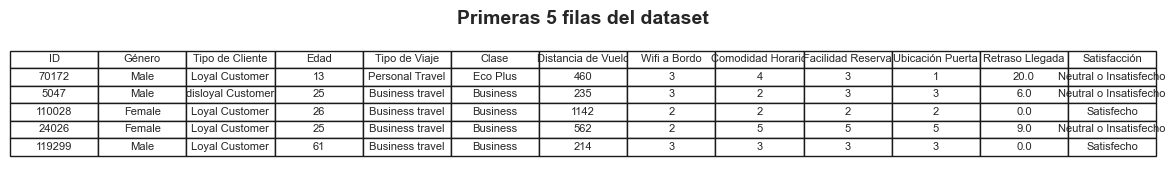

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con las primeras 5 filas del dataset (según la estructura proporcionada)
data = {
    "ID": [70172, 5047, 110028, 24026, 119299],
    "Género": ["Male", "Male", "Female", "Female", "Male"],
    "Tipo de Cliente": ["Loyal Customer", "disloyal Customer", "Loyal Customer", "Loyal Customer", "Loyal Customer"],
    "Edad": [13, 25, 26, 25, 61],
    "Tipo de Viaje": ["Personal Travel", "Business travel", "Business travel", "Business travel", "Business travel"],
    "Clase": ["Eco Plus", "Business", "Business", "Business", "Business"],
    "Distancia de Vuelo": [460, 235, 1142, 562, 214],
    "Wifi a Bordo": [3, 3, 2, 2, 3],
    "Comodidad Horario": [4, 2, 2, 5, 3],
    "Facilidad Reserva": [3, 3, 2, 5, 3],
    "Ubicación Puerta": [1, 3, 2, 5, 3],
    "Retraso Llegada": [20.0, 6.0, 0.0, 9.0, 0.0],
    "Satisfacción": ["Neutral o Insatisfecho", "Neutral o Insatisfecho", "Satisfecho", "Neutral o Insatisfecho", "Satisfecho"]
}

df_preview = pd.DataFrame(data)

# Configurar la visualización
plt.figure(figsize=(12, 2))
plt.axis('off')
plt.title('Primeras 5 filas del dataset', fontsize=14, fontweight='bold')
table = plt.table(cellText=df_preview.values,
                  colLabels=df_preview.columns,
                  loc='center',
                  cellLoc='center',
                  colLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()


In [100]:
# Información sobre los tipos de datos
print("\nInformación sobre los tipos de datos:")
df.info()


Información sobre los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  

In [101]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas de variables numéricas:")
df.describe()


Estadísticas descriptivas de variables numéricas:


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


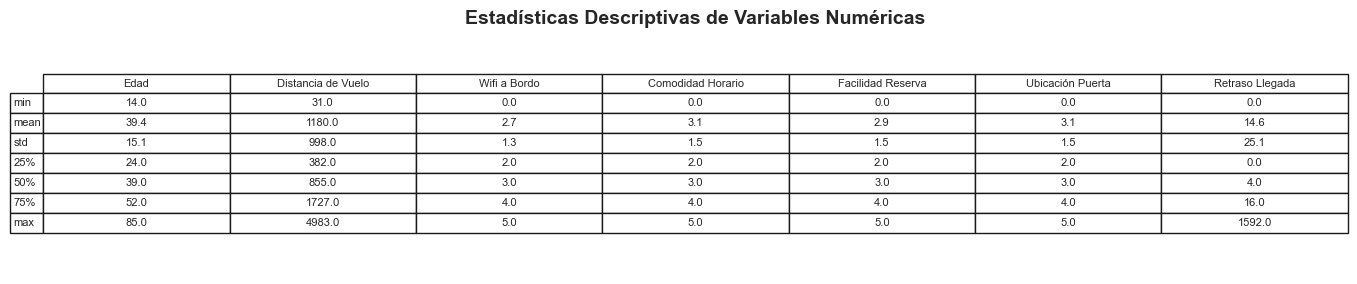

In [102]:
# Visualización de estadísticas descriptivas
desc_data = {
    "Edad": [14.0, 39.4, 15.1, 24.0, 39.0, 52.0, 85.0],
    "Distancia de Vuelo": [31.0, 1180.0, 998.0, 382.0, 855.0, 1727.0, 4983.0],
    "Wifi a Bordo": [0.0, 2.7, 1.3, 2.0, 3.0, 4.0, 5.0],
    "Comodidad Horario": [0.0, 3.1, 1.5, 2.0, 3.0, 4.0, 5.0],
    "Facilidad Reserva": [0.0, 2.9, 1.5, 2.0, 3.0, 4.0, 5.0],
    "Ubicación Puerta": [0.0, 3.1, 1.5, 2.0, 3.0, 4.0, 5.0],
    "Retraso Llegada": [0.0, 14.6, 25.1, 0.0, 4.0, 16.0, 1592.0]
}

index = ["min", "mean", "std", "25%", "50%", "75%", "max"]
desc_df = pd.DataFrame(desc_data, index=index)

# Visualización en tabla
plt.figure(figsize=(14, 3))
plt.axis('off')
plt.title('Estadísticas Descriptivas de Variables Numéricas', fontsize=14, fontweight='bold')
table = plt.table(cellText=desc_df.values.round(2),
                  rowLabels=desc_df.index,
                  colLabels=desc_df.columns,
                  loc='center',
                  cellLoc='center',
                  colLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()


In [103]:
# Estadísticas descriptivas de variables categóricas
print("\nEstadísticas descriptivas de variables categóricas:")
df.describe(include=['object'])


Estadísticas descriptivas de variables categóricas:


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## 2. ANÁLISIS DE VALORES FALTANTES

In [104]:
# Verificamos valores nulos
print("\nValores nulos por columna:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Valores faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})
missing_data[missing_data['Valores faltantes'] > 0]


Valores nulos por columna:


,Valores faltantes,Porcentaje (%)
Arrival Delay in Minutes,310,0.298352


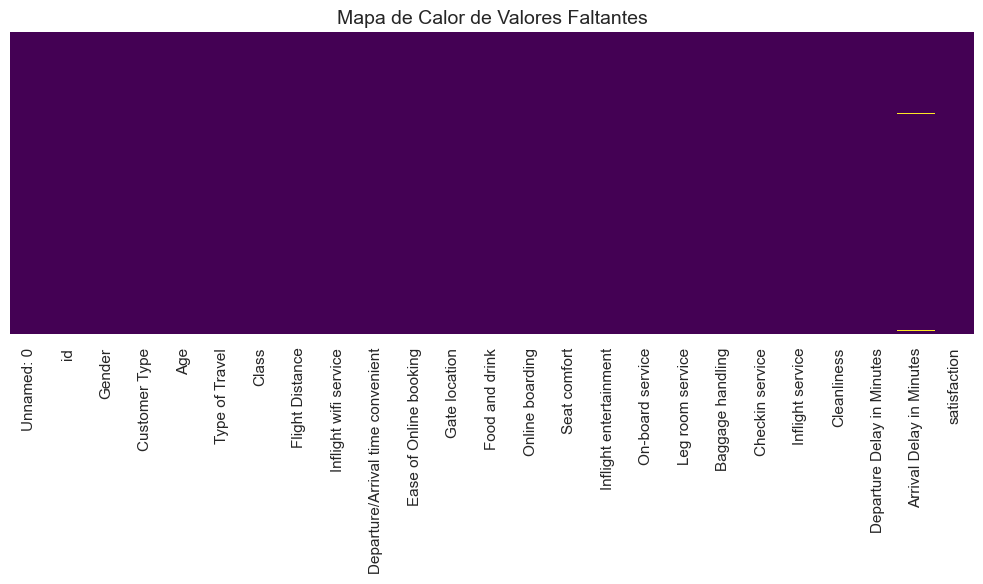

In [105]:
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes', fontsize=14)
plt.tight_layout()
plt.show()
plt.close()

In [106]:
# Porcentaje de valores faltantes por columna
missing_percent = df.isnull().mean() * 100

# Mostrar solo columnas con valores faltantes
missing_percent[missing_percent > 0].sort_values(ascending=False)


Arrival Delay in Minutes    0.298352
dtype: float64

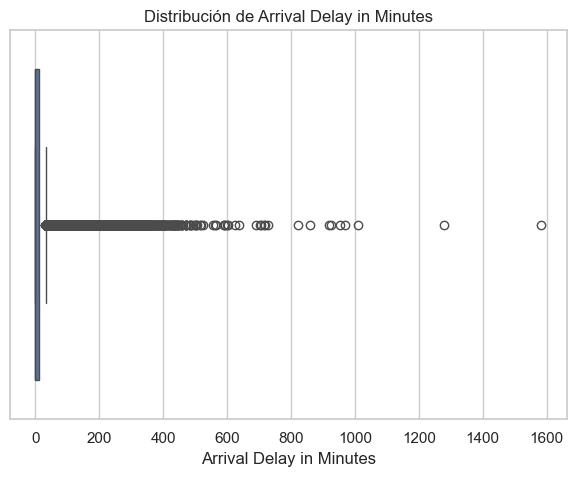

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para Arrival Delay in Minutes
sns.boxplot(x=df["Arrival Delay in Minutes"])
plt.title("Distribución de Arrival Delay in Minutes")
plt.show()

# Estadísticas descriptivas
df["Arrival Delay in Minutes"].describe()


- se observan outliers significativos en la variable "Arrival Delay in Minutes",
con valores que superan los 1000 minutos. Esto confirma que la distribución está sesgada positivamente, 
por lo tanto, la mediana es la opción adecuada para imputar los valores faltantes.

# 3. ANÁLISIS DE LA VARIABLE OBJETIVO (SATISFACTION)

In [108]:
# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (satisfaction):")
satisfaction_counts = df['satisfaction'].value_counts()
print(satisfaction_counts)
print(f"Porcentaje de clientes satisfechos: {satisfaction_counts.get('satisfied', 0) / len(df) * 100:.2f}%")
print(f"Porcentaje de clientes insatisfechos: {satisfaction_counts.get('neutral or dissatisfied', 0) / len(df) * 100:.2f}%")



Distribución de la variable objetivo (satisfaction):
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64
Porcentaje de clientes satisfechos: 43.33%
Porcentaje de clientes insatisfechos: 56.67%


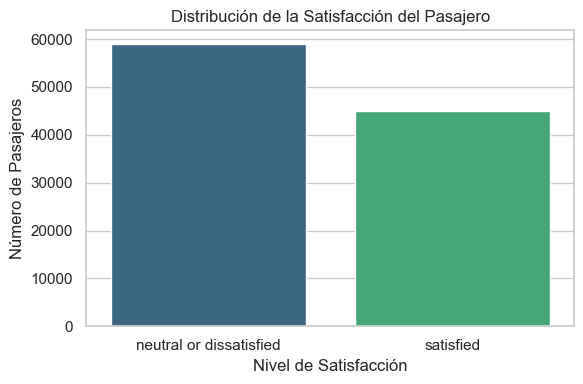

In [109]:
# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', data=df, hue='satisfaction', palette='viridis', legend=False)
plt.title("Distribución de la Satisfacción del Pasajero")
plt.xlabel("Nivel de Satisfacción")
plt.ylabel("Número de Pasajeros")
plt.tight_layout()
plt.show()

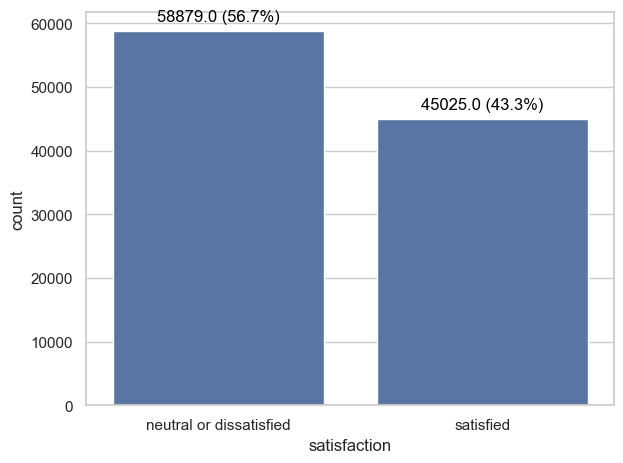

In [110]:
# Visualización de la distribución de la variable objetivo con porcentajes
sns.countplot(data=df, x='satisfaction')

# Añadimos etiquetas con valores y porcentajes
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.annotate(f'{p.get_height()} ({percentage})', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=12, color='black', 
                 xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()
plt.close()

## 4. ANÁLISIS UNIVARIADO: VARIABLES CATEGÓRICAS

In [111]:
# Identificar variables categóricas (excluyendo la variable objetivo)
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'Satisfaction']

### Distribución de cada variable categórica (Gender, Customer Type, Type of Travel, Class)

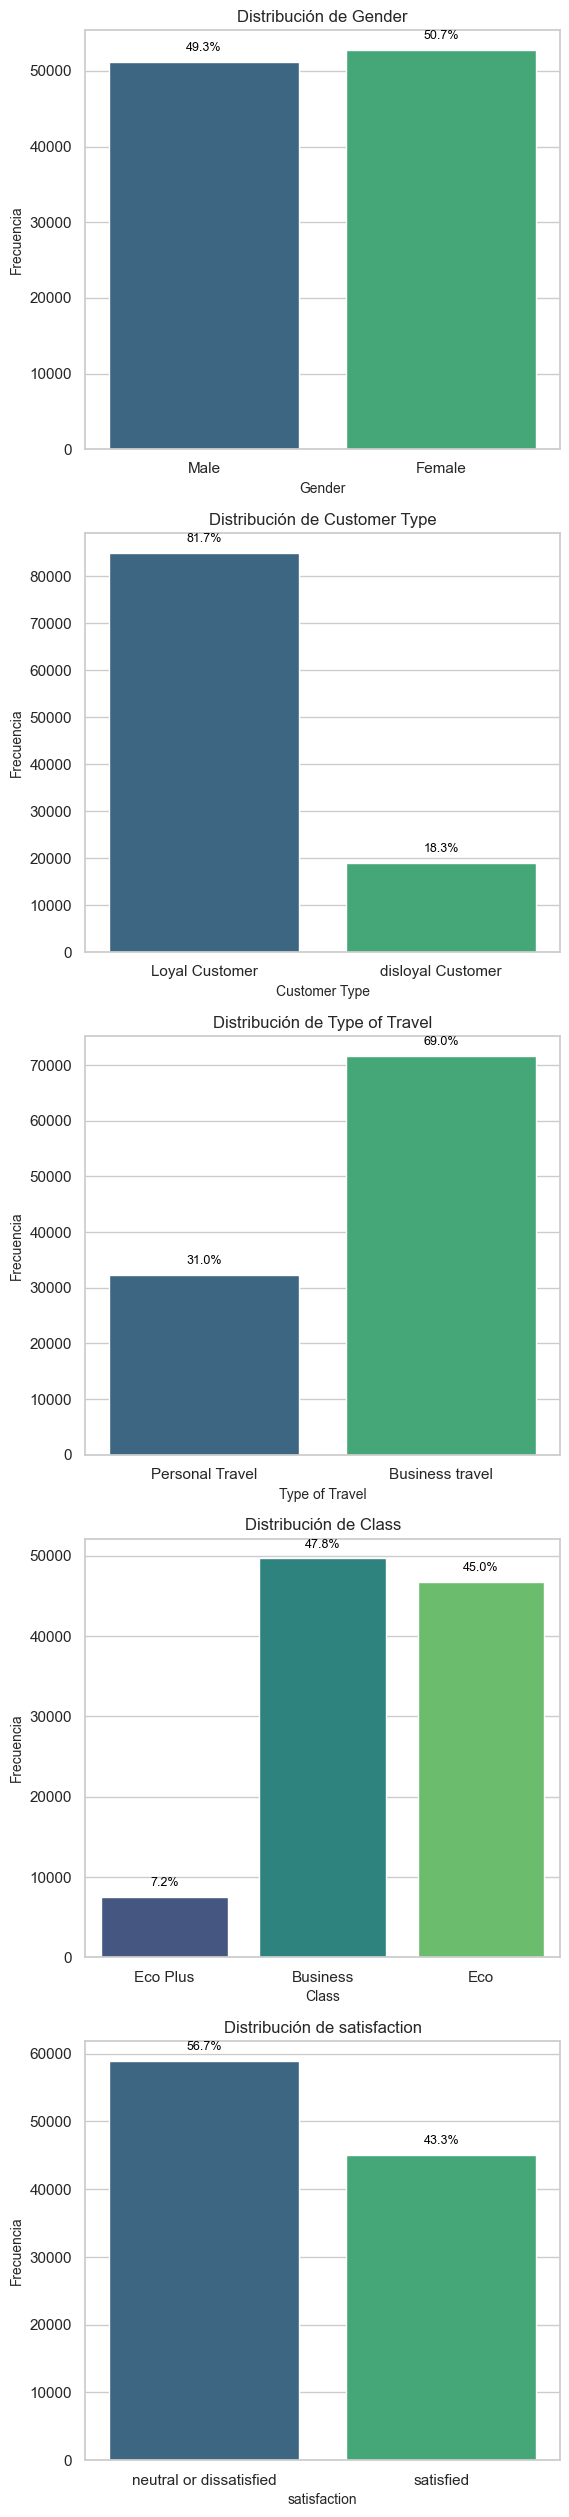

In [112]:
# Análisis y visualización de variables categóricas
plt.figure(figsize=(12, len(categorical_columns)*6))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 2, 2*i+1)
    sns.countplot(x=column, data=df, palette='viridis', hue=column)
    plt.title(f'Distribución de {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

# Añadimos porcentajes
    total = len(df)
    for p in plt.gca().patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                     textcoords='offset points')

### Relación de cada categoría con la satisfacción del cliente

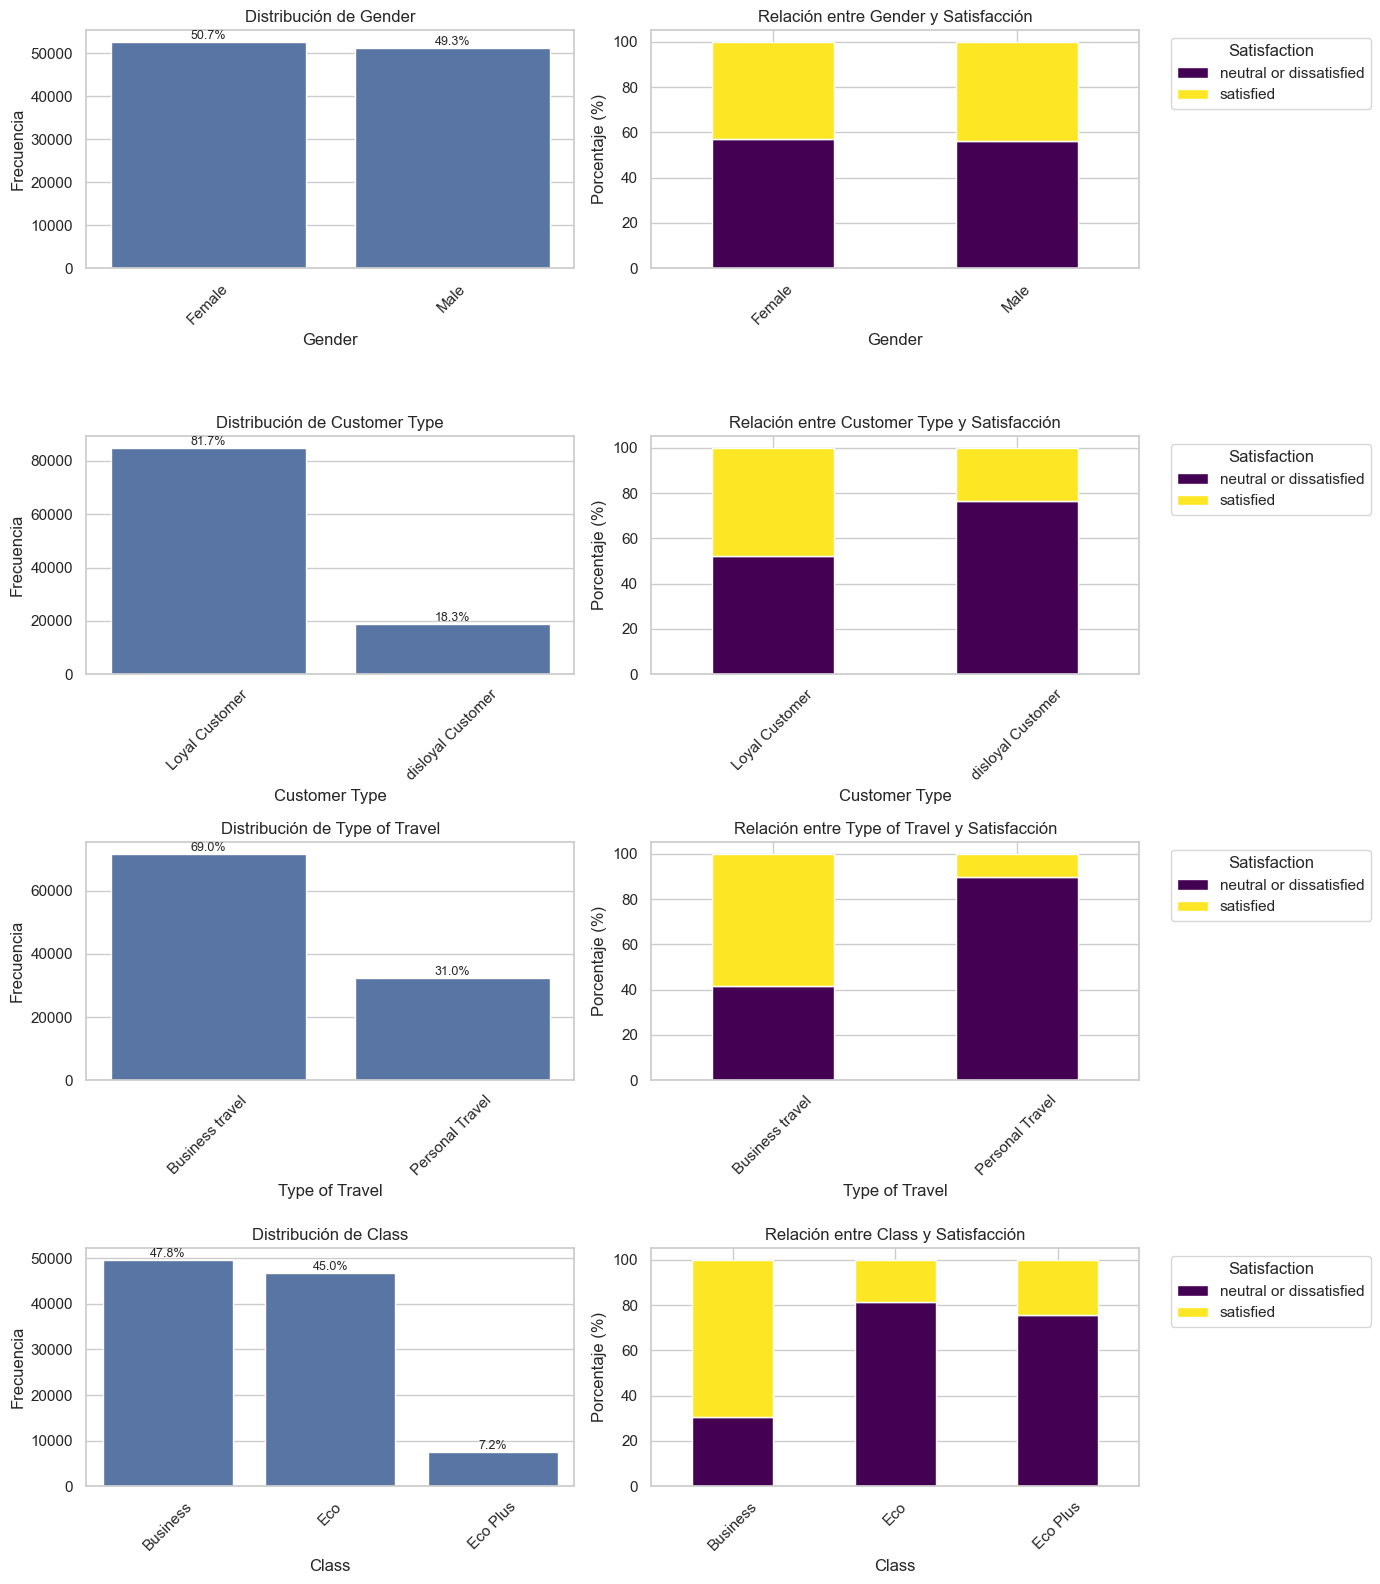

In [113]:
categorical_columns = ["Gender", "Customer Type", "Type of Travel", "Class"]

fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(14, 4 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    # Gráfico de barras con porcentaje por categoría
    ax1 = axes[i, 0]
    sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=ax1)
    total = len(df)
    for p in ax1.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax1.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9)
    ax1.set_title(f'Distribución de {column}', fontsize=12)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)

    # Gráfico de barras apiladas (% por satisfacción)
    ax2 = axes[i, 1]
    cross_tab = pd.crosstab(df[column], df['satisfaction'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax2)
    ax2.set_title(f'Relación entre {column} y Satisfacción', fontsize=12)
    ax2.set_xlabel(column)
    ax2.set_ylabel('Porcentaje (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
plt.close()


## 5. ANÁLISIS UNIVARIADO: VARIABLES NUMÉRICAS

In [114]:
# Identificar variables numéricas (excluyendo posibles IDs)
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                    if col not in ['id', 'Unnamed: 0']]

In [115]:
# Análisis de variables numéricas: estadísticas descriptivas
num_stats = df[numerical_columns].describe().T
num_stats['missing'] = df[numerical_columns].isnull().sum()
num_stats['missing_percentage'] = df[numerical_columns].isnull().sum() / len(df) * 100
num_stats['skewness'] = df[numerical_columns].skew()
num_stats['kurtosis'] = df[numerical_columns].kurtosis()
print("\nEstadísticas detalladas de variables numéricas:")
print(num_stats)


Estadísticas detalladas de variables numéricas:
                                      count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
Gate location                      103904.0     2.976883    1.277621   0.0   
Food and drink                     103904.0     3.202129    1.329533   0.0   
Online boarding                    103904.0     3.250375    1.349509   0.0   
Seat comfort                       103904.0     3.439396    1.319088   0.0   
Inflight entertainment             103904.0     3.358158    1.332991   0.0   
On-board service                   103904.0     3.382363    1.288354   0.0   
Leg room servic

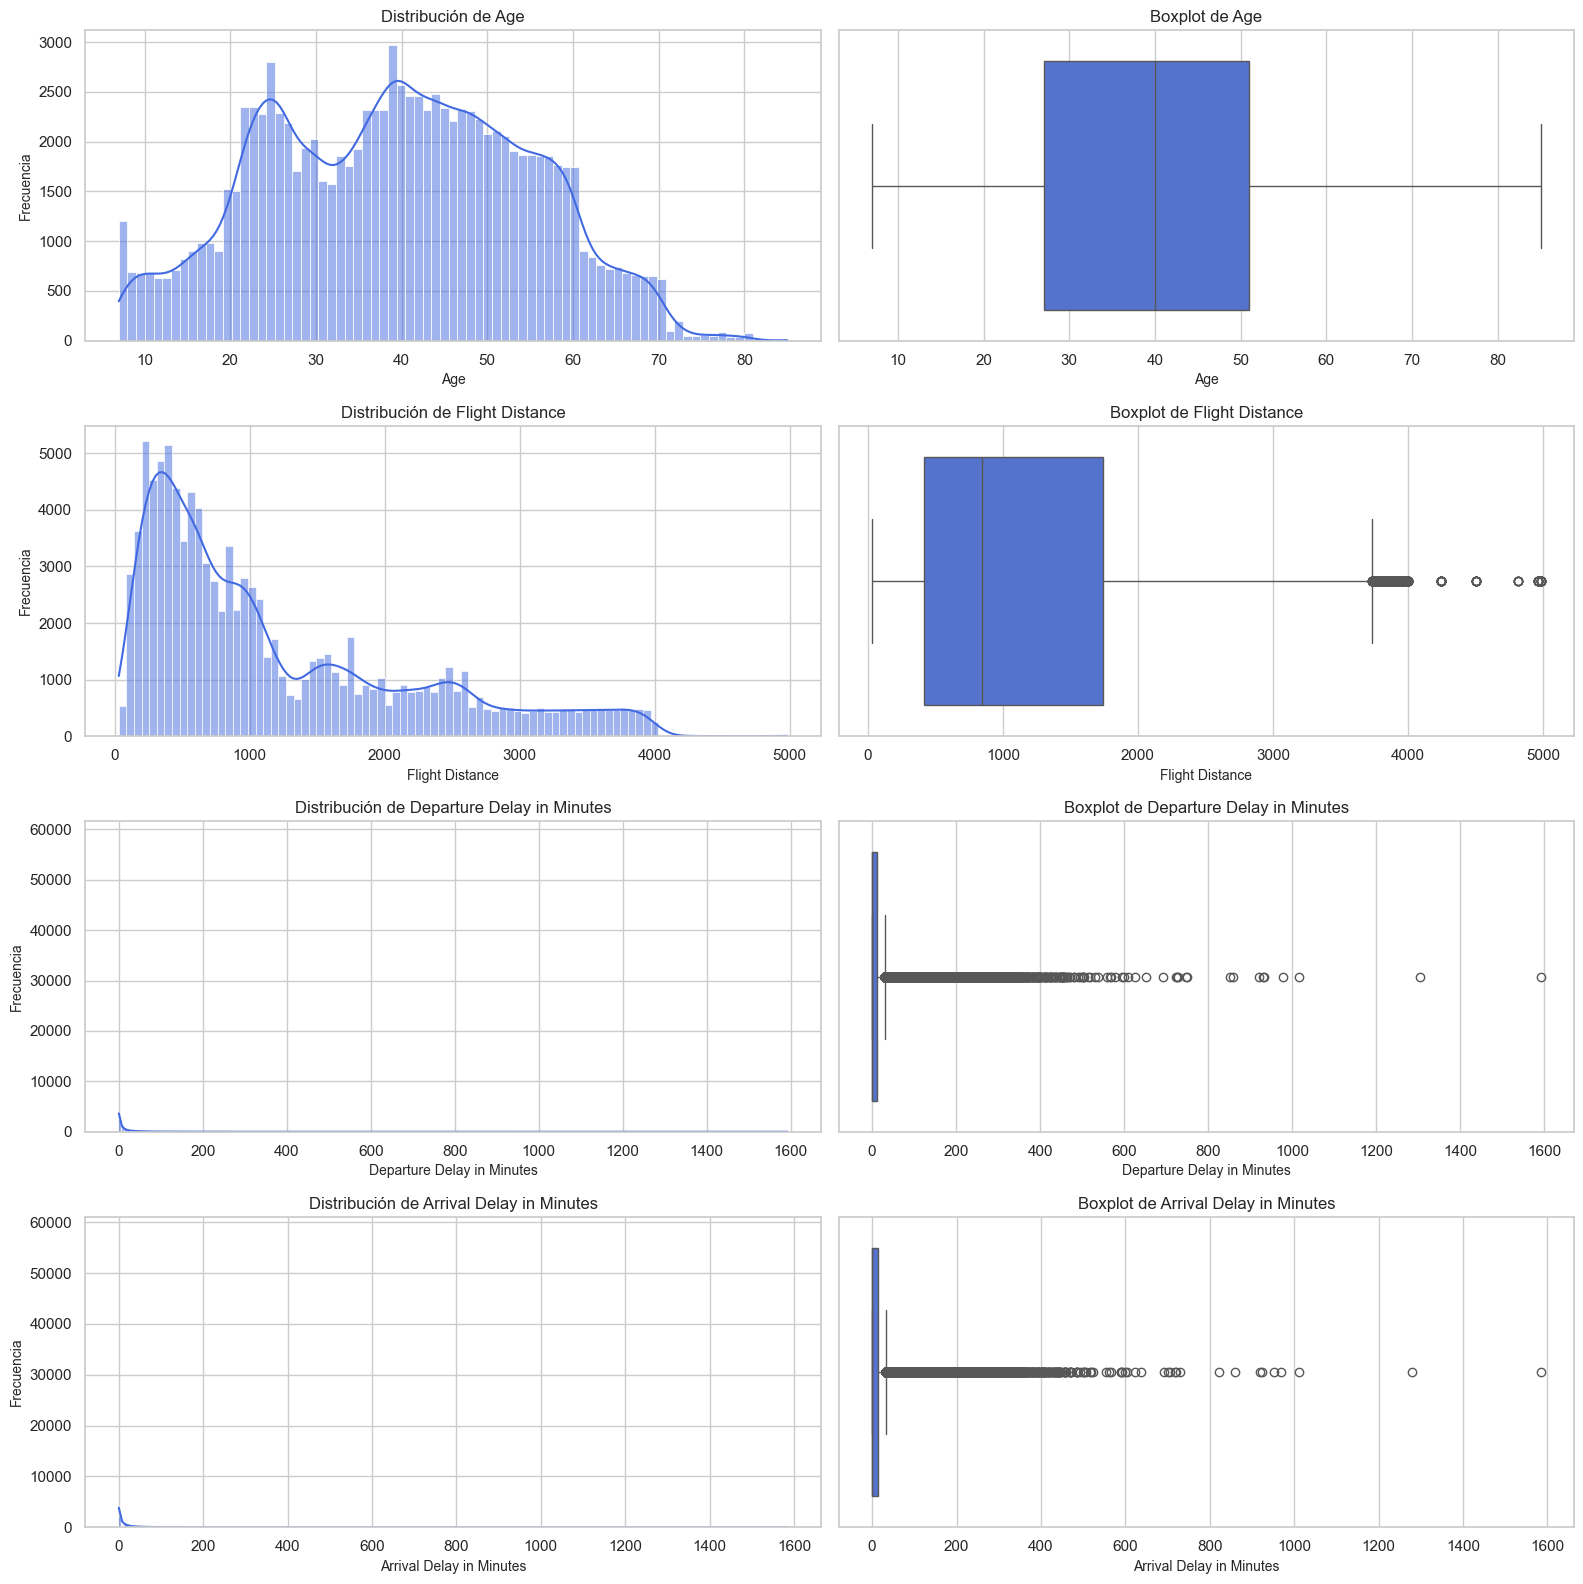

In [116]:
# Visualización de distribuciones y boxplots para variables numéricas continuas
continuous_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(16, len(continuous_vars)*4))

for i, column in enumerate(continuous_vars):
    # Histograma con KDE
    plt.subplot(len(continuous_vars), 2, 2*i+1)
    sns.histplot(df[column].dropna(), kde=True, color='royalblue')
    plt.title(f'Distribución de {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    
    # Boxplot
    plt.subplot(len(continuous_vars), 2, 2*i+2)
    sns.boxplot(x=df[column].dropna(), color='royalblue')
    plt.title(f'Boxplot de {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)

plt.tight_layout()
plt.show()
plt.close()

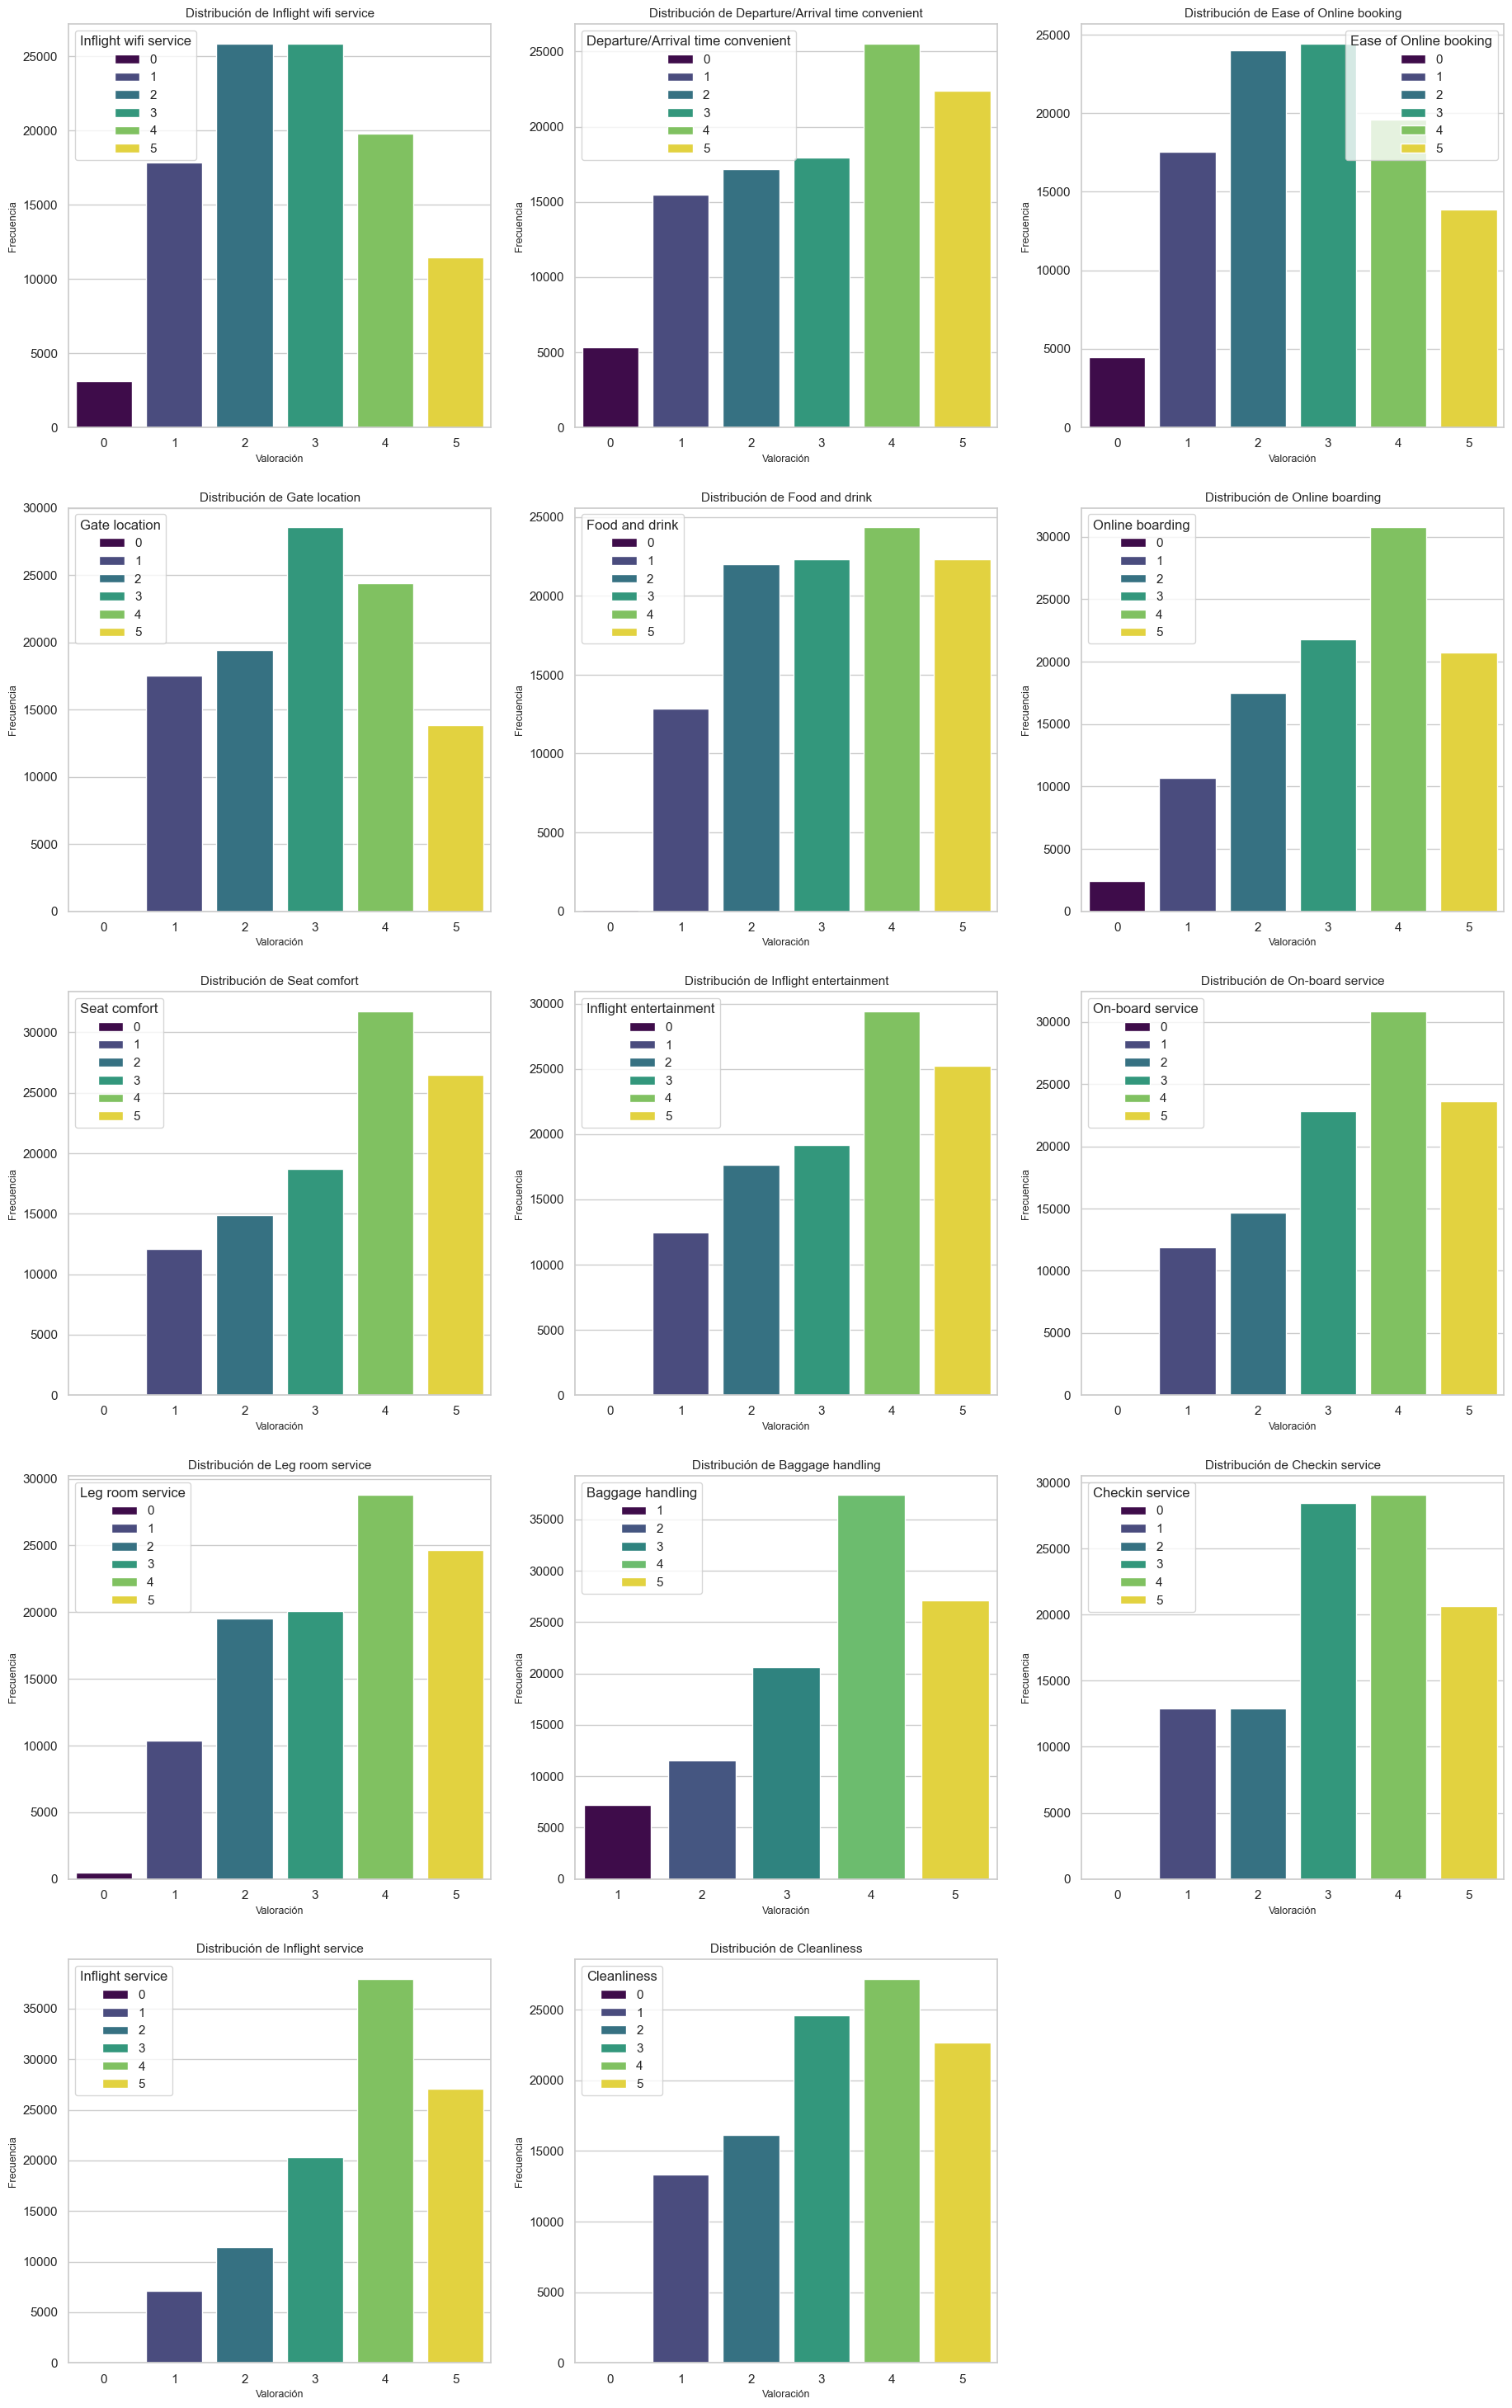

In [117]:
# Visualización de variables de ratings (escala Likert)
rating_columns = [col for col in numerical_columns if col not in continuous_vars]

plt.figure(figsize=(20, len(rating_columns)*2.5))

for i, column in enumerate(rating_columns):
    plt.subplot(len(rating_columns)//3 + 1, 3, i+1)
    sns.countplot(x=column, data=df, palette='viridis', hue=column)
    plt.title(f'Distribución de {column}', fontsize=11)
    plt.xlabel('Valoración', fontsize=9)
    plt.ylabel('Frecuencia', fontsize=9)

# 6. ANÁLISIS BIVARIADO: RELACIÓN CON LA SATISFACCIÓN

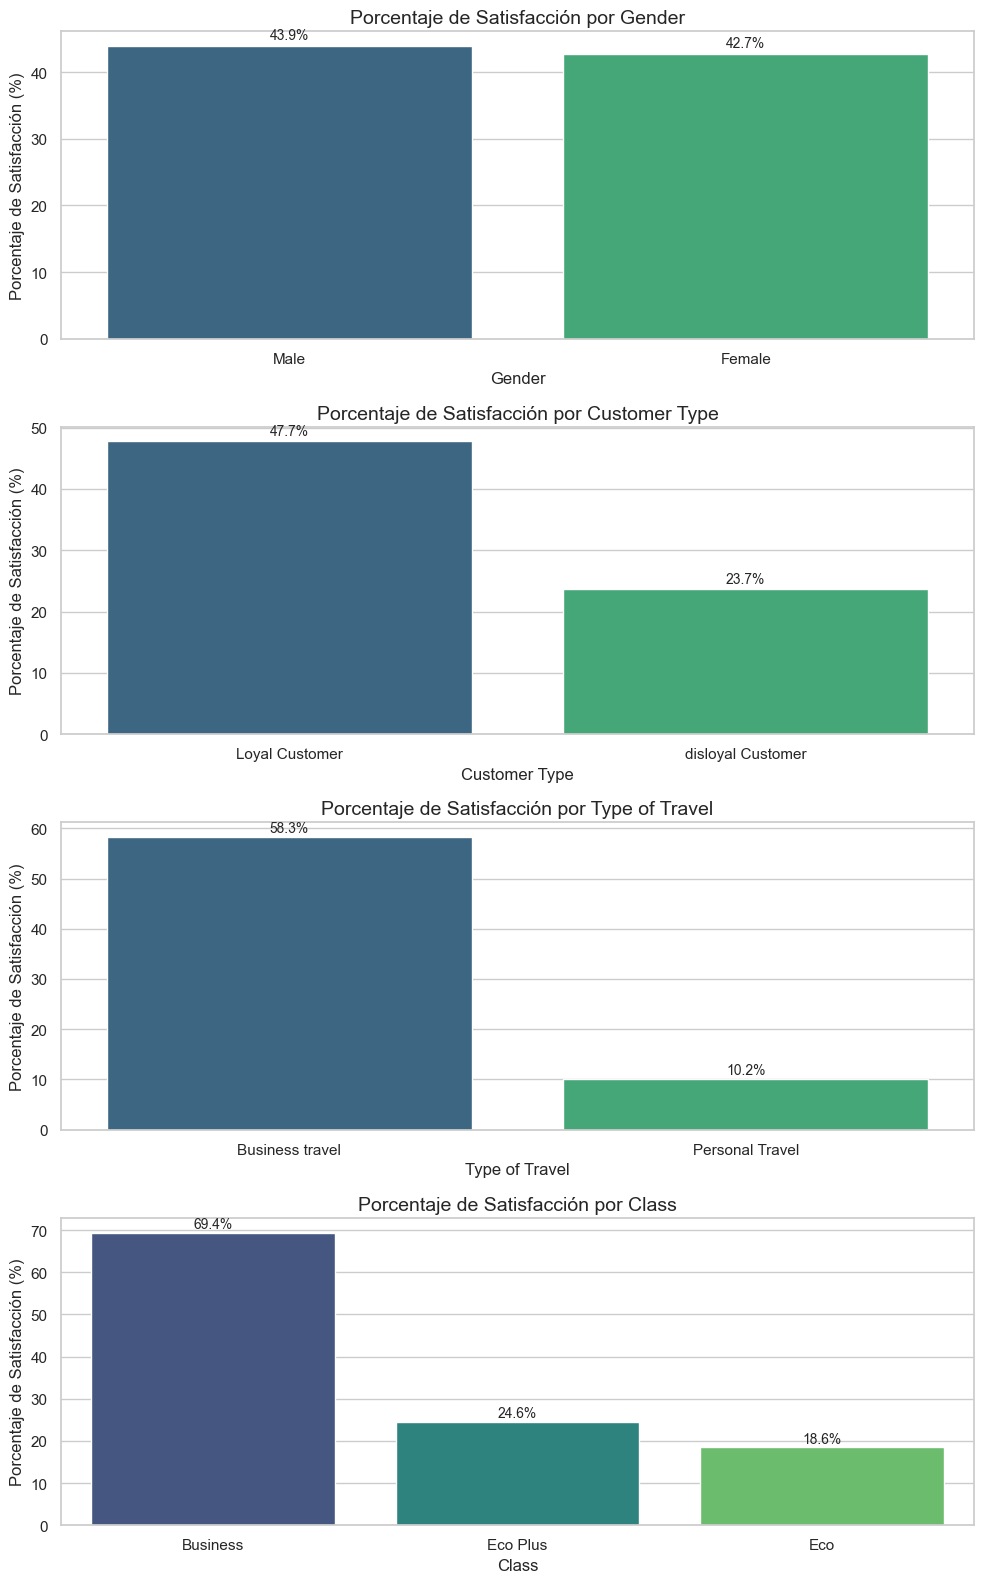

In [118]:
# Convertimos la variable objetivo a numérica para facilitar el análisis
df['Satisfaction_Numeric'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Análisis de variables categóricas vs. satisfacción
plt.figure(figsize=(10, len(categorical_columns)*4))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i+1)
    
    # Calculamos los porcentajes por categoría
    satisfaction_by_category = df.groupby(column)['Satisfaction_Numeric'].mean() * 100
    
    # Ordenamos para mejor visualización
    satisfaction_by_category = satisfaction_by_category.sort_values(ascending=False)
    
    sns.barplot(x=satisfaction_by_category.index, y=satisfaction_by_category.values , palette='viridis', hue=satisfaction_by_category.index)
    plt.title(f'Porcentaje de Satisfacción por {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Porcentaje de Satisfacción (%)', fontsize=12)
    
    # Añadimos los valores
    for j, v in enumerate(satisfaction_by_category.values):
        plt.text(j, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
plt.close()

/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_19726/1944787912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=column, data=df, palette='viridis')
/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_19726/1944787912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=column, data=df, palette='viridis')
/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_19726/1944787912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y=column, data=df, palette='vi

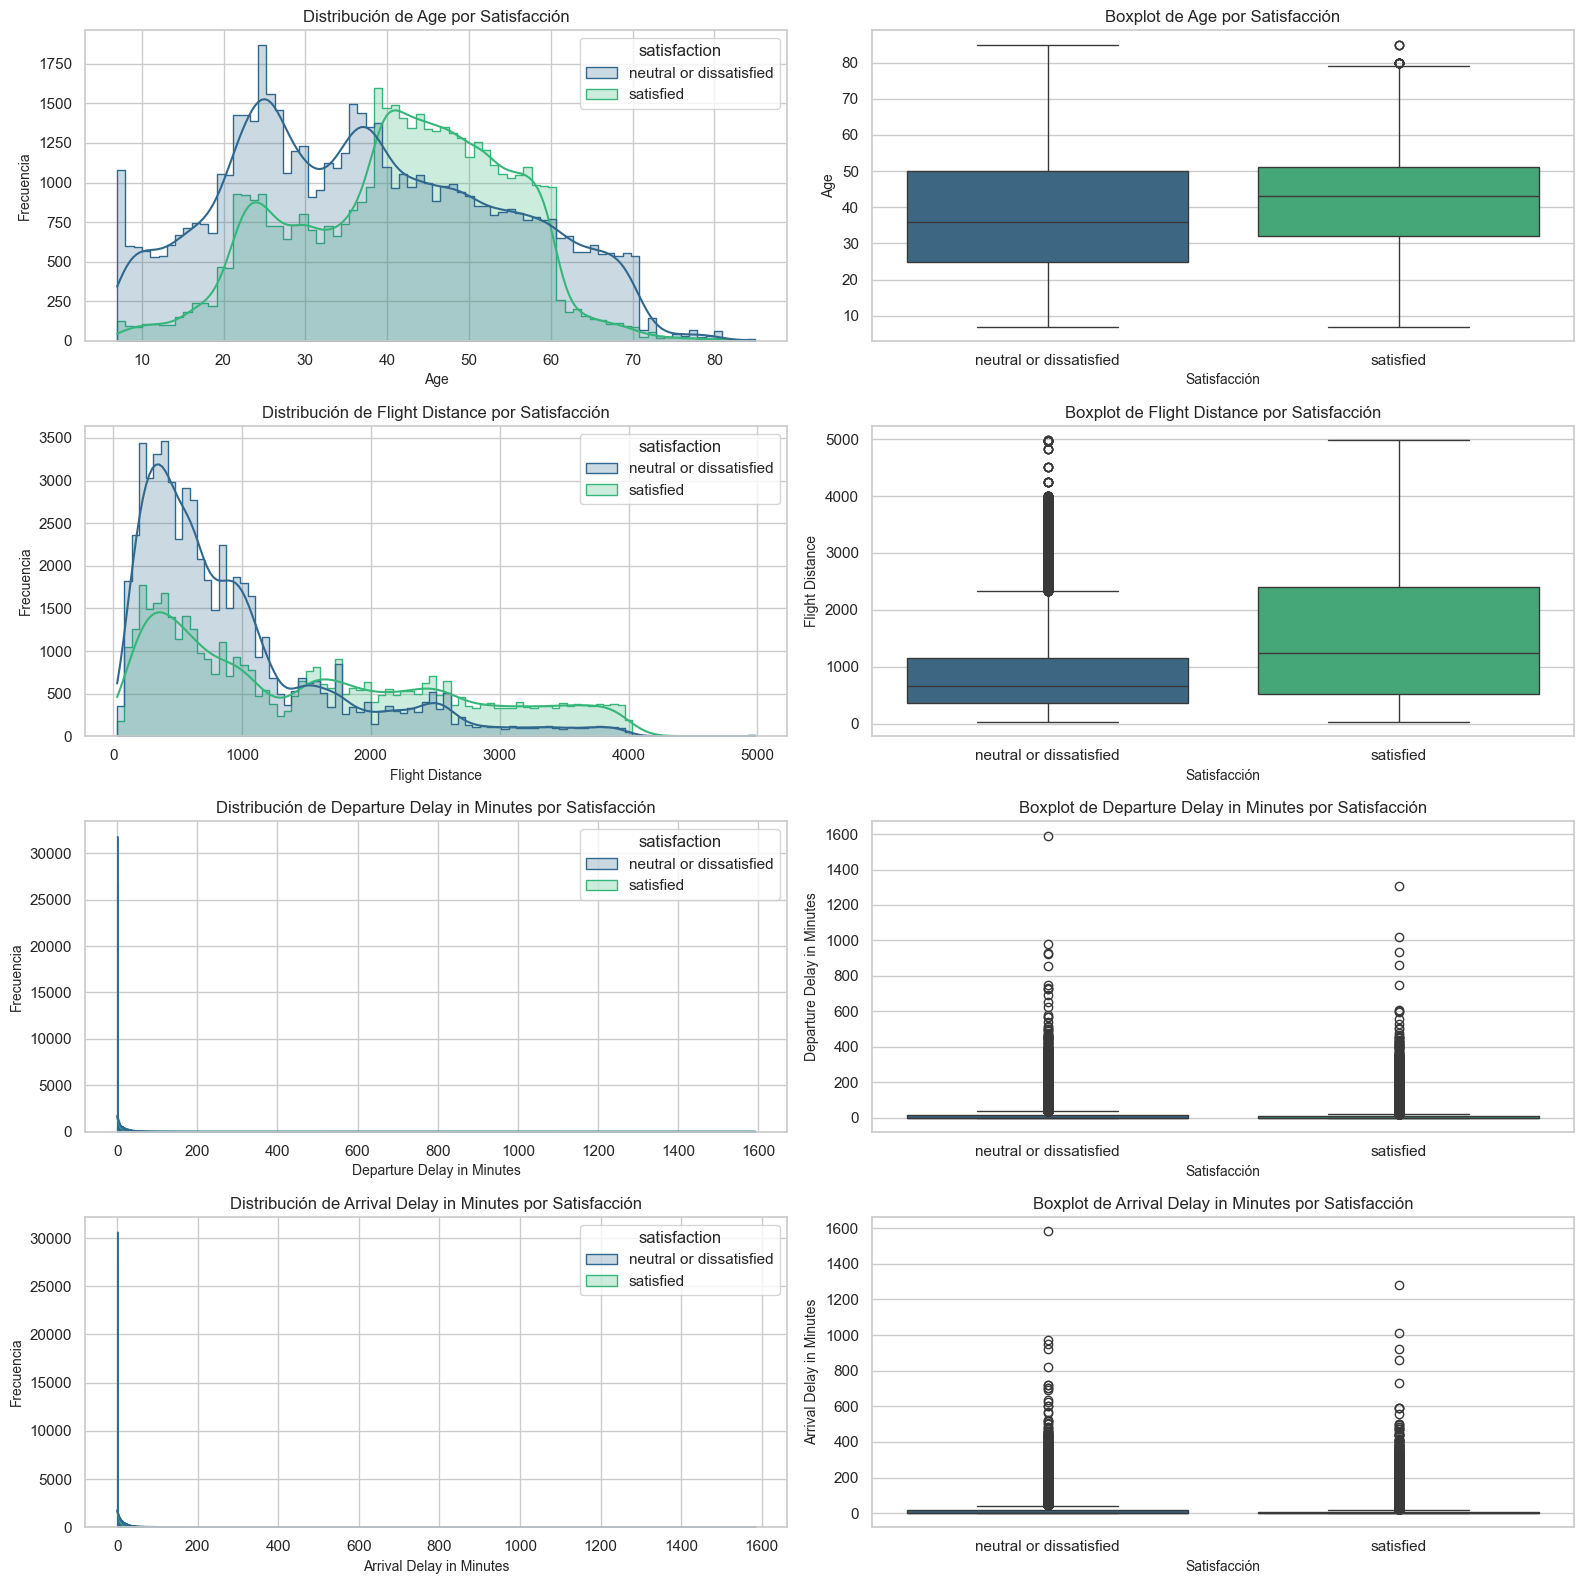

In [119]:
# Análisis de variables continuas vs. satisfacción
plt.figure(figsize=(16, len(continuous_vars)*4))

for i, column in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars), 2, 2*i+1)
    
    # Histograma agrupado por satisfacción
    sns.histplot(data=df, x=column, hue='satisfaction', kde=True, palette='viridis', element='step', common_norm=False)
    plt.title(f'Distribución de {column} por Satisfacción', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    
    plt.subplot(len(continuous_vars), 2, 2*i+2)
    # Boxplot agrupado por satisfacción
    sns.boxplot(x='satisfaction', y=column, data=df, palette='viridis')
    plt.title(f'Boxplot de {column} por Satisfacción', fontsize=12)
    plt.xlabel('Satisfacción', fontsize=10)
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()
plt.close()


# 7. ANÁLISIS MULTIVARIADO: CORRELACIONES

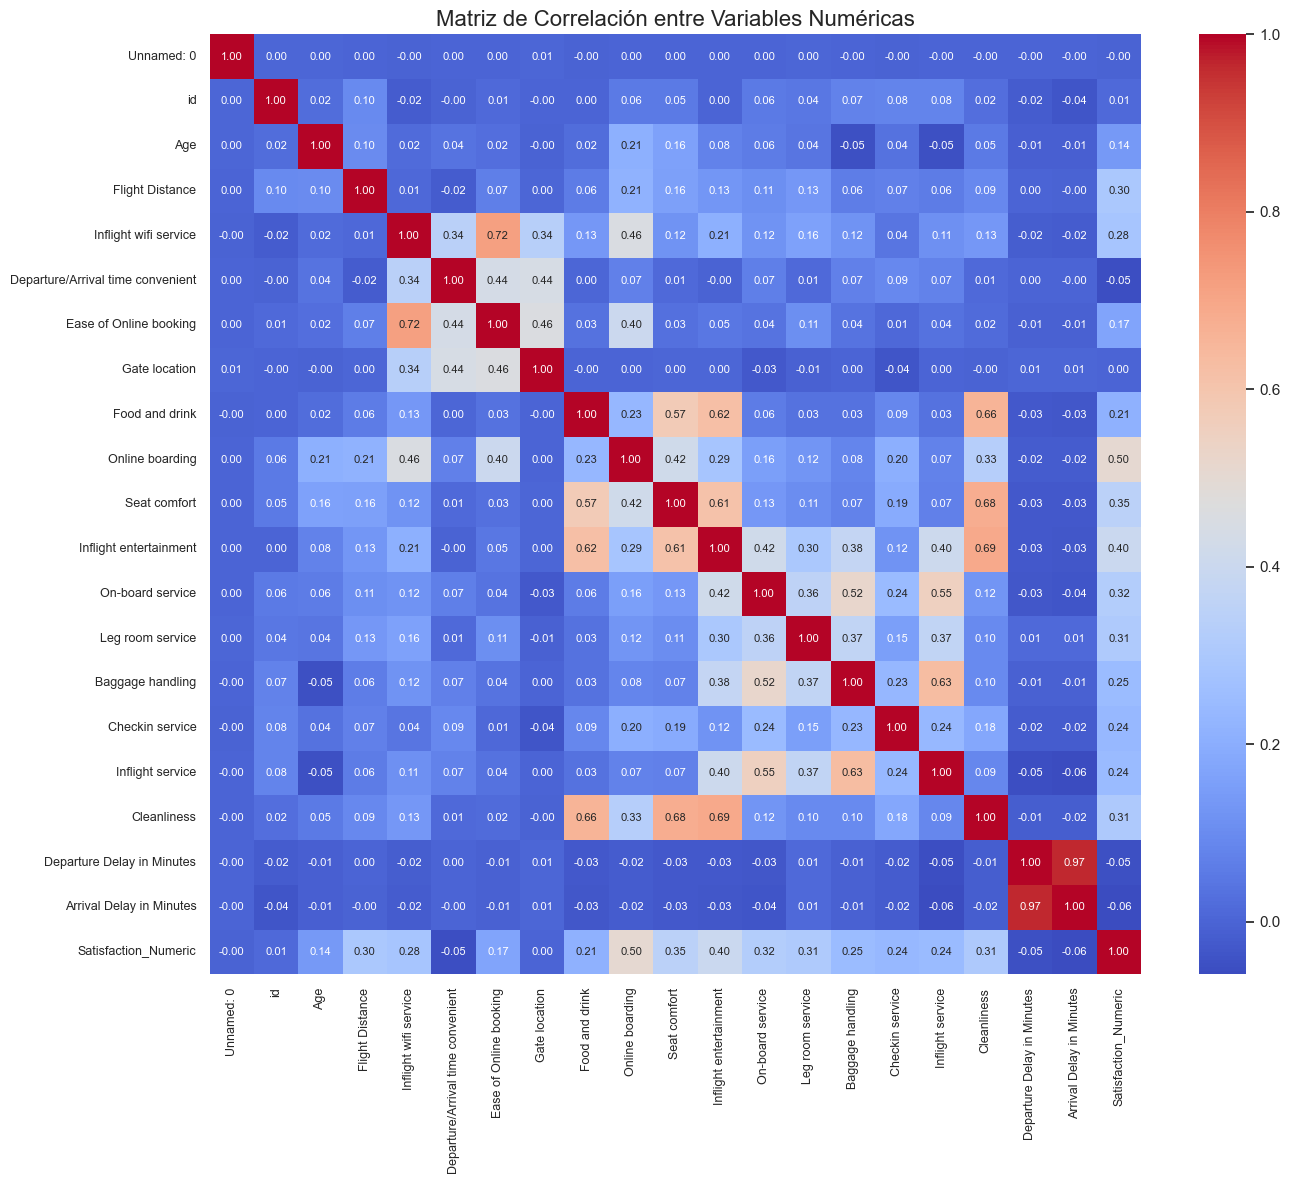

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("/Users/andresuescum/Bootcamp/flight-feel-analyzer/data/airline_passenger_satisfaction.csv")
# Convertir la variable de satisfacción a numérica
df['Satisfaction_Numeric'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
# Calcular la matriz de correlación
# Convertir variables categóricas a numéricas  

correlation = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.set(font_scale=1.0)  # Ajusta el tamaño del texto general
heatmap = sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",  # Muestra solo dos decimales
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 8}  # Tamaño de fuente específico para los números
)

plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


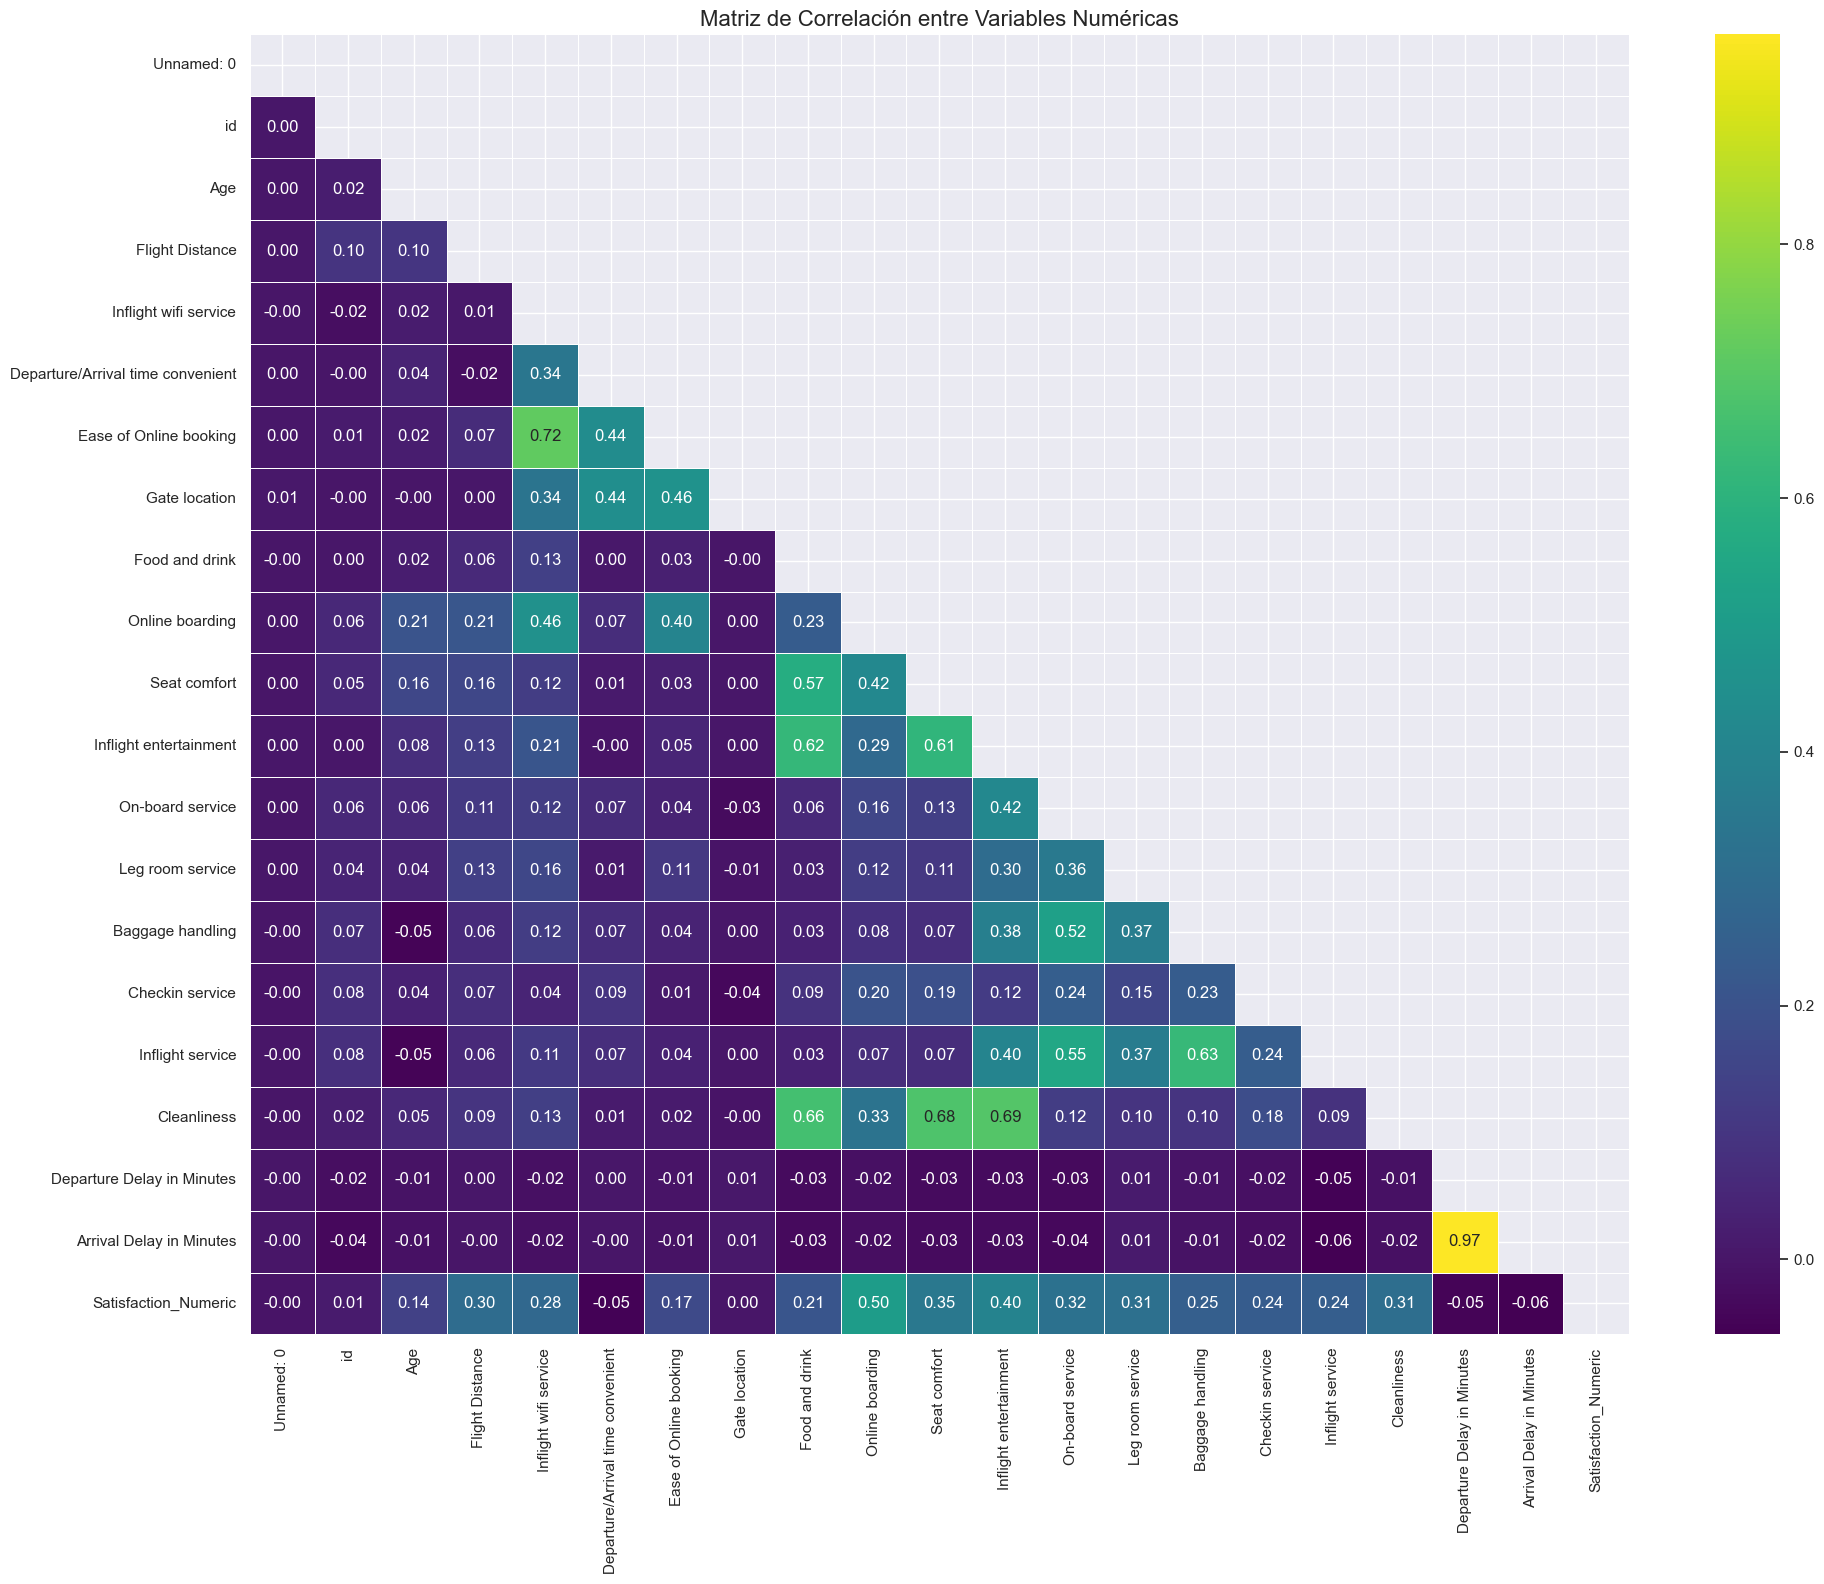

In [152]:
# Matriz de correlación para variables numéricas
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
corr_matrix = numerical_data.corr()

# Visualizamos la matriz de correlación usando un mapa de calor
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()
plt.close()


Top 10 variables más correlacionadas con la satisfacción:
Satisfaction_Numeric      1.000000
Online boarding           0.503557
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Flight Distance           0.298780
Inflight wifi service     0.284245
Baggage handling          0.247749
Inflight service          0.244741
Name: Satisfaction_Numeric, dtype: float64


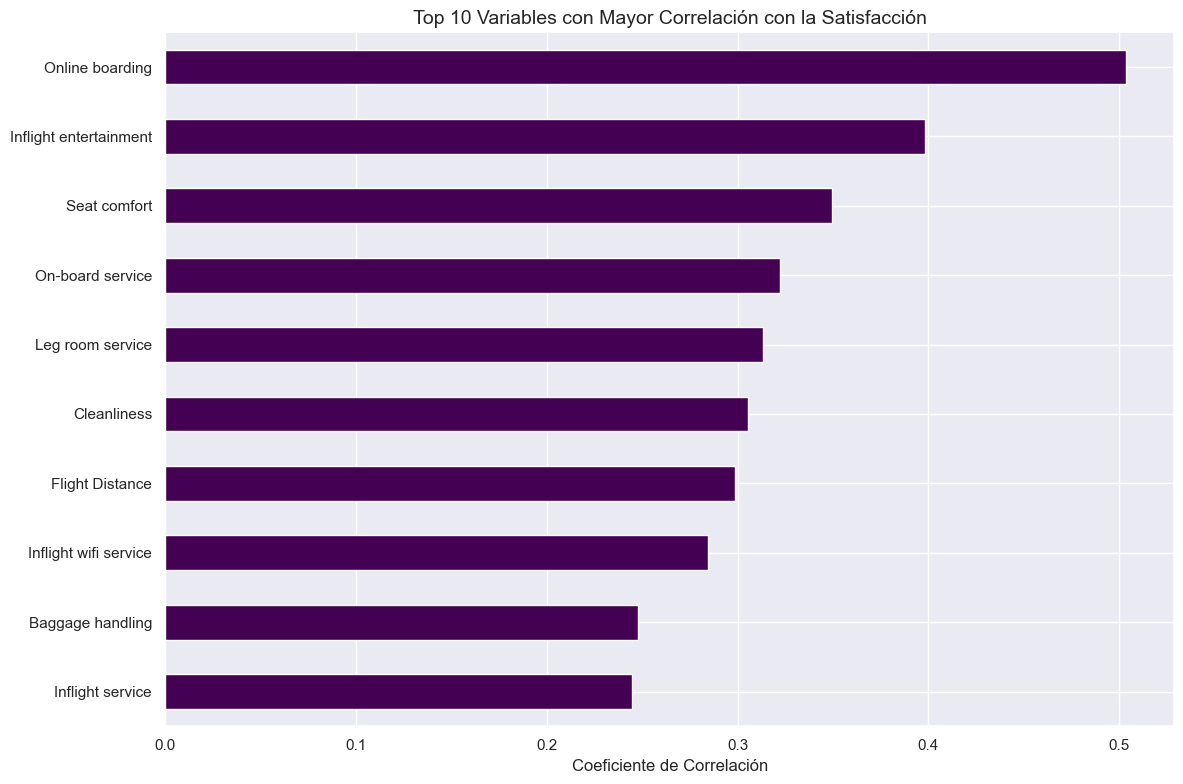

In [148]:
# Correlación con la variable objetivo
correlations_with_satisfaction = corr_matrix['Satisfaction_Numeric'].sort_values(ascending=False)
print("\nTop 10 variables más correlacionadas con la satisfacción:")
print(correlations_with_satisfaction[:11])  # 11 porque incluye la propia Satisfaction_Numeric

# Visualizamos las correlaciones con la satisfacción
plt.figure(figsize=(12, 8))
top_correlations = correlations_with_satisfaction[1:11]  # Excluimos Satisfaction_Numeric
top_correlations.sort_values().plot(kind='barh', colormap='viridis')
plt.title('Top 10 Variables con Mayor Correlación con la Satisfacción', fontsize=14)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.tight_layout()
plt.show()
plt.close()

# 8. ANÁLISIS DE SEGMENTACIÓN

In [122]:
# 8. ANÁLISIS DE SEGMENTACIÓN

<Figure size 1400x800 with 0 Axes>

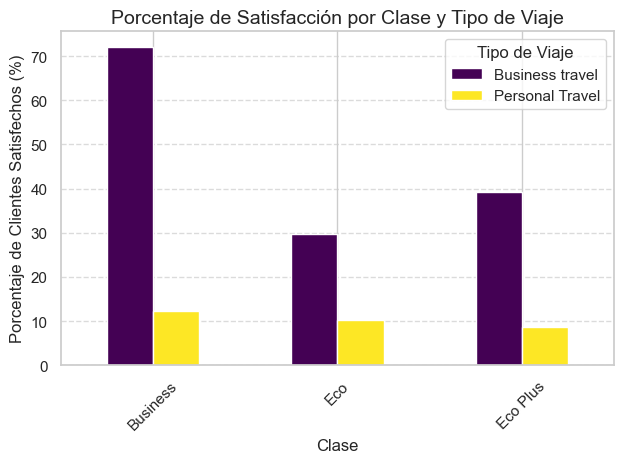

In [123]:
# Analizamos la interacción entre Clase, Tipo de Viaje y Satisfacción
plt.figure(figsize=(14, 8))
cross_tab = pd.crosstab([df['Class'], df['Type of Travel']], df['satisfaction'])
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Visualizamos el porcentaje de satisfacción por segmento
cross_tab_percentage['satisfied'].unstack().plot(kind='bar', colormap='viridis')
plt.title('Porcentaje de Satisfacción por Clase y Tipo de Viaje', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Porcentaje de Clientes Satisfechos (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Viaje')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()


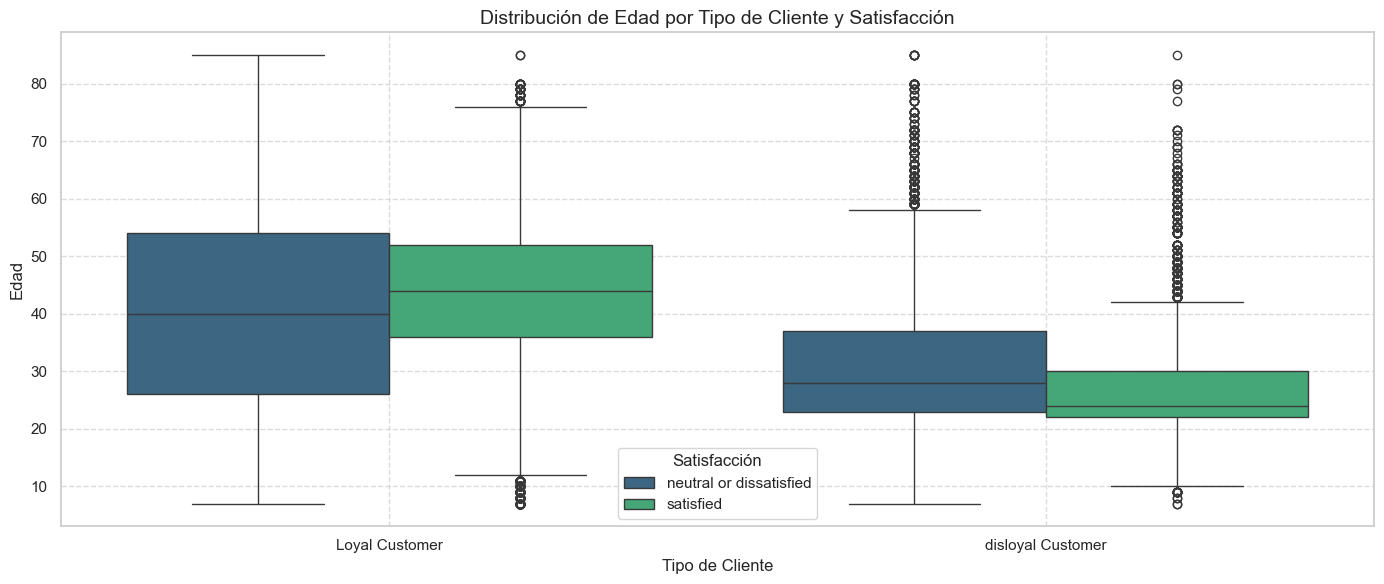

In [124]:
# Análisis por tipo de cliente y edad
plt.figure(figsize=(14, 6))
sns.boxplot(x='Customer Type', y='Age', hue='satisfaction', data=df, palette='viridis')
plt.title('Distribución de Edad por Tipo de Cliente y Satisfacción', fontsize=14)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.legend(title='Satisfacción')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# 9. ANÁLISIS DE RETRASOS Y SU IMPACTO

/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_19726/2418188006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_satisfaction.index.map({0: 'Insatisfecho', 1: 'Satisfecho'}),
/var/folders/q0/7q_y8nr570g3v743vlrfff340000gn/T/ipykernel_19726/2418188006.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_satisfaction.index.map({0: 'Insatisfecho', 1: 'Satisfecho'}),


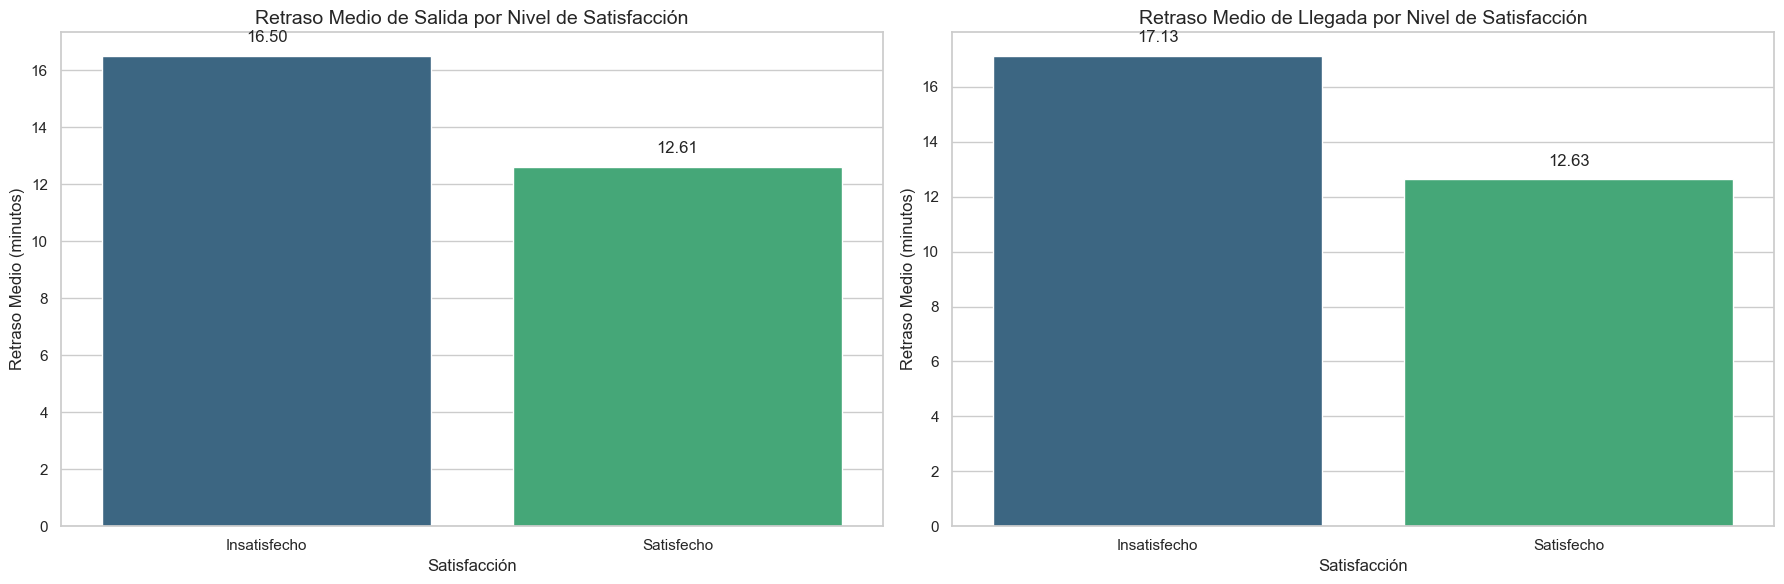

In [125]:
# Análisis del impacto de los retrasos en la satisfacción
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
delay_satisfaction = df.groupby('Satisfaction_Numeric')['Departure Delay in Minutes'].mean()
sns.barplot(x=delay_satisfaction.index.map({0: 'Insatisfecho', 1: 'Satisfecho'}), 
           y=delay_satisfaction.values, palette='viridis')
plt.title('Retraso Medio de Salida por Nivel de Satisfacción', fontsize=14)
plt.xlabel('Satisfacción', fontsize=12)
plt.ylabel('Retraso Medio (minutos)', fontsize=12)
for i, v in enumerate(delay_satisfaction.values):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=12)

plt.subplot(1, 2, 2)
delay_satisfaction = df.groupby('Satisfaction_Numeric')['Arrival Delay in Minutes'].mean()
sns.barplot(x=delay_satisfaction.index.map({0: 'Insatisfecho', 1: 'Satisfecho'}), 
           y=delay_satisfaction.values, palette='viridis') 
plt.title('Retraso Medio de Llegada por Nivel de Satisfacción', fontsize=14)
plt.xlabel('Satisfacción', fontsize=12)
plt.ylabel('Retraso Medio (minutos)', fontsize=12)
for i, v in enumerate(delay_satisfaction.values):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()
plt.close()

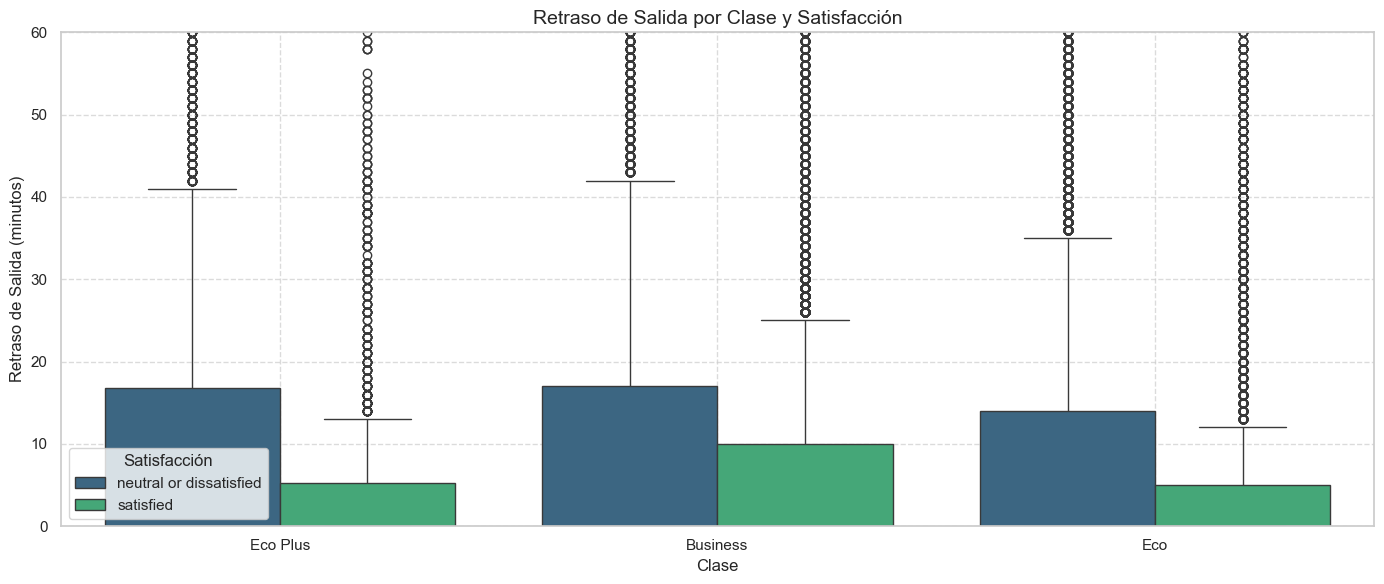

In [126]:
# Análisis de retrasos por clase
plt.figure(figsize=(14, 6))
sns.boxplot(x='Class', y='Departure Delay in Minutes', hue='satisfaction', data=df, palette='viridis')
plt.title('Retraso de Salida por Clase y Satisfacción', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Retraso de Salida (minutos)', fontsize=12)
plt.legend(title='Satisfacción')
plt.ylim(0, 60)  # Limitamos el eje Y para mejor visualización
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# 10. VISUALIZACIÓN DE SERVICIOS POR IMPORTANCIA

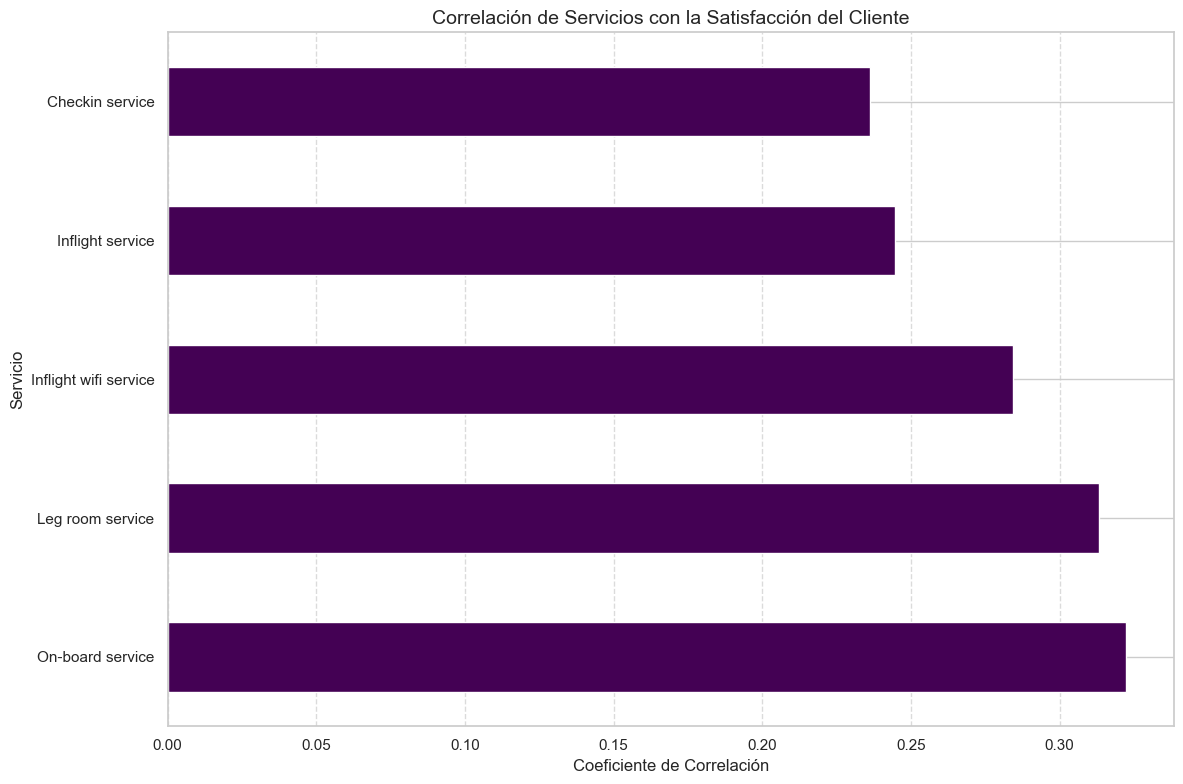

In [127]:
# Ordenamos los servicios por su correlación con la satisfacción
service_columns = [col for col in rating_columns if 'service' in col.lower() or 'satisfaction' in col.lower()]
service_corr = corr_matrix['Satisfaction_Numeric'][service_columns].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
service_corr.plot(kind='barh', colormap='viridis')
plt.title('Correlación de Servicios con la Satisfacción del Cliente', fontsize=14)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Servicio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()


# 11. RESUMEN DE HALLAZGOS

In [128]:
print("\n========= RESUMEN DE HALLAZGOS DEL EDA =========")
print("1. Distribución de la variable objetivo:")
print(f"   - Clientes satisfechos: {satisfaction_counts.get('satisfied', 0) / len(df) * 100:.2f}%")
print(f"   - Clientes neutral/insatisfechos: {satisfaction_counts.get('neutral or dissatisfied', 0) / len(df) * 100:.2f}%")

print("\n2. Top 5 factores más correlacionados con la satisfacción:")
for i, (feature, corr) in enumerate(top_correlations[:5].items(), 1):
    print(f"   {i}. {feature}: {corr:.4f}")

print("\n3. Hallazgos clave en variables categóricas:")
cat_insights = [
    "- Los viajeros de negocios tienden a estar más satisfechos que los viajeros personales",
    "- La clase Business muestra niveles de satisfacción significativamente más altos",
    "- Los clientes leales muestran mayor satisfacción que los clientes no leales",
    "- Existe una marcada diferencia en la satisfacción según el segmento de cliente"
]
for insight in cat_insights:
    print(f"   {insight}")

print("\n4. Hallazgos clave en variables numéricas:")
num_insights = [
    "- Los retrasos en salidas y llegadas muestran correlación negativa con la satisfacción",
    "- La distancia del vuelo parece tener poca influencia en la satisfacción general",
    "- La edad muestra una relación no lineal con la satisfacción",
    "- Las valoraciones de servicios a bordo son fuertes predictores de satisfacción"
]
for insight in num_insights:
    print(f"   {insight}")

print("\n5. Servicios con mayor impacto en la satisfacción:")
top_services = service_corr[:5]
for service, impact in top_services.items():
    print(f"   - {service}: {impact:.4f}")

print("\n6. Recomendaciones para el modelo de clasificación:")
recommendations = [
    "- Considerar los servicios a bordo como características principales",
    "- Incluir características derivadas de los retrasos (ej. retraso total)",
    "- Segmentar por tipo de viaje y clase para mejorar la precisión",
    "- Transformar variables con distribución sesgada (como los retrasos)",
    "- Incluir interacciones entre tipo de cliente y calificaciones de servicio"
]
for recommendation in recommendations:
    print(f"   {recommendation}")


========= RESUMEN DE HALLAZGOS DEL EDA =========
1. Distribución de la variable objetivo:
   - Clientes satisfechos: 43.33%
   - Clientes neutral/insatisfechos: 56.67%

2. Top 5 factores más correlacionados con la satisfacción:
   1. Online boarding: 0.5036
   2. Inflight entertainment: 0.3981
   3. Seat comfort: 0.3495
   4. On-board service: 0.3224
   5. Leg room service: 0.3131

3. Hallazgos clave en variables categóricas:
   - Los viajeros de negocios tienden a estar más satisfechos que los viajeros personales
   - La clase Business muestra niveles de satisfacción significativamente más altos
   - Los clientes leales muestran mayor satisfacción que los clientes no leales
   - Existe una marcada diferencia en la satisfacción según el segmento de cliente

4. Hallazgos clave en variables numéricas:
   - Los retrasos en salidas y llegadas muestran correlación negativa con la satisfacción
   - La distancia del vuelo parece tener poca influencia en la satisfacción general
   - La edad m